[![img/pythonista.png](img/pythonista.png)](https://www.pythonista.io)

# Gestión de selecciones.

## Inicialización de *D3.js* en la notebook.

La siguiente celda permite habilitar *D3.js* dentro de esta notebook y debe de ser ejecutada siempre antes que cualquier otra celda. 

**Advertencia:**
En caso de no inicializar *D3.js* como primera acción, es probable que el código de las siguientes celdas no funcione aún cuando se haga una inicialización posteriormente. En ese caso, es necesario limpiar todas las salidas de las celdas, guardar y recargar la notebook.

In [1]:
%%javascript
    require.config({
        paths: {
            d3: 'https://d3js.org/d3.v7'
        }
    })

<IPython.core.display.Javascript object>

## Datos de prueba.

El archivo ```data\calificaciones.csv``` contiene lo siguiente:

``` csv
Nombre,py101,py111,py121,py201,py211
Enrique,8,7,6,NA,NA
Alberto,6,8,9,8,8
Rocío,8,8,9,9,9
Julián,10,9,9,8,10
Norberto,8,NA,6,7,7
Carmen,9,9,9,10,9
Ximena,NA,NA,8,8,9
Iván,8,8,7,8,8
Sergio,7,6,6,7,7
```

## La función ```selection.filter()```.

La función ```d3.selection.filter()``` permite evaluar cada dato generado por el método ```d3.selection.enter()``` a partir de una expresión que regrese un valor booleano. Se seleccionarán sólo aquellos datos que obtengan un valor ```true``` como resultado de la función.

https://github.com/d3/d3-selection#selection_filter


In [ ]:
%%html
<div id="contenedor-1">
</div>

* La siguiente celda traerá los datos de aquellos elementos en donde el dato de la columna ```py121``` sea mayor que ```6```.

In [ ]:
%%javascript

require(["d3"], function(d3) {
    d3.csv("data/calificaciones.csv",).then(function(datos){
        d3.select("#contenedor-1").
            selectAll("p").
            data(datos).
            enter().
            append("p").
            filter(d => d.py121 > 6). // se fitra en función de una expresión lógica
            text(d => d.Nombre + ". py101: " + d.py101 + ". py111: " + d.py111 
                 + ". py121: " + d.py121);
    })
});

In [ ]:
%%html
<div id="contenedor-2">
</div>

* La siguiente celda traerá los datos de aquellos elementos en donde el dato de la columna ```py101``` no sea un número.

In [ ]:
%%javascript

require(["d3"], function(d3) {
    d3.csv("data/calificaciones.csv",).then(function(datos){
        d3.select("#contenedor-2").
            selectAll("p").
            data(datos).
            enter().append("p").
            filter(d => isNaN(d.py101)).
            text(d => d.Nombre + ". py101: " + d.py101 + ". py111: " + d.py111 
                 + ". py121: " + d.py121);
    })
});

## La función ```selection.join()```.

La función ```selection.join()``` permite actualizar los dato de una selección.

https://github.com/d3/d3-selection#selection_join

In [ ]:
%%html
<div id="contenedor-3">
</div>

* La siguiente celda desplegará un párrafo en que se actualizarán los datos ded cada fila de ```data/calificaciones.csv``` cada 2 segundo.

In [ ]:
%%javascript

require(["d3"], function(d3){
    
    // se define la función sleep(), la cual permitirá pausar con await
    function sleep(delay){
    return new Promise((resolve) => {
        setTimeout(() => resolve(), delay)})
    }
    
    // Esta función modificará a todos los elementos <p> en función de los datos
    function actualiza_alumno(selection, dato){
        selection.
            selectAll("p").
            data([dato]). // Array de un elemento que corresponde a dato
            join("p").
            text(d => d.Nombre + ". py101: " + d.py101 + ". py111: " + d.py111 
                 + ". py121: " + d.py121);      
    }
    
    // Se extraern los datos y para cada fila se ejecuta actualiza_alumno()
    d3.csv("data/calificaciones.csv").
        then(async function(datos){
        
            let contenedor = d3.select("#contenedor-3");
            
            for (let dato of datos){
                actualiza_alumno(contenedor, dato);
                await sleep(2000);
            }
        });
    });

In [ ]:
%%svg
<svg id="contenedor-4" width="700" height="100">
</svg>

* La siguiente celda desplegará una serie de círculos  que se actualizarán en función de los datos contenidos en la variable ```datos``` cada 2 segundo.

In [ ]:
%%javascript

require(["d3"], function(d3){
    
    // se define la función sleep(), la cual permitirá pausar con await
    function sleep(delay){
    return new Promise((resolve) => {
        setTimeout(() => resolve(), delay)})
    }
    
    // Esta función modificará a todos los elementos <circle> en función de los datos
    function actualiza_circulos(selection, data){
        selection.
            selectAll("circle").
            data(data).
            join("circle").
            attr("cx", (d, i) => 30 + i * 100).
            attr("cy", 50).
            attr("fill", "gold").
            attr("r", d => d * 10);
    }
    
    let contenedor = d3.select("#contenedor-4");
    
    let datos = [[1, 2, 3, 4, 5],
                 [3, 2],
                 [1, 3, 4, 5, 3, 2, 1],
                 [5, 3, 1, 5, 4, 3],
                 [],
                 [4, 2, 1]];
    
    // Función que desplegará los círculos por cada arreglo  en datos
    async function circulos(){
        for (let dato of datos){
            actualiza_circulos(contenedor, dato);
            console.log(dato);
            await sleep(3000);
        }
    }
    
    circulos();  
});

## La función ```selection.insert()```.

La función ```selection.insert()``` insertará un elemento dentro de un contenedor y antes un elemento hijo que se usará de referencia.

```
<padre>.insert("<nuevo>", "<hijo>")
```

Donde:
* ```<hijo>``` es el selector que identifica a un elemento.
* ```<padre>``` es un elemento que debe de ser el padre de hijo.
* ```<nuevo>``` es el selector de un elemento nevo.

https://github.com/d3/d3-selection#selection_insert

In [ ]:
%%svg

<svg id="contenedor-5" width="100" height="100">
    <g id="grupo-5">
        <circle cx="50" cy="50" r="20" fill="blue">
        </circle>
    </g>
</svg>

* la siguiente celda insertará un elemento ```<g>``` dentro del elemento con ```id=contenedor-5"``` y antes del elemento con ```id=contenedor-5"```.

In [ ]:
%%javascript

require(["d3"], function(d3){

    let contenedor = d3.select("#contenedor-5");    
    contenedor.
        insert("g", "#grupo-5").
        append("circle").
        attr("r", "30").
        attr("cx", "70").
        attr("cy", "50").
        attr("fill", "green");
    
    console.log(contenedor);
});

## La función ```selection.remove()```.

https://github.com/d3/d3-selection#selection_remove

In [ ]:
%%svg

<svg id="contenedor-6" width="100" height="100">
    <g id="grupo-6">
        <circle cx="50" cy="50" r="20" fill="blue">
        </circle>
    </g>
</svg>

In [ ]:
%%javascript

require(["d3"], function(d3){

    d3.select("#grupo-6 circle").
        remove();
});

## La función ```selection.clone()```.

https://github.com/d3/d3-selection#selection_clone

In [ ]:
%%svg

<svg id="contenedor-7" width="200" height="100">
    <g id="grupo-7">
        <circle cx="50" cy="50" r="20" fill="blue">
        </circle>
    </g>
</svg>

In [ ]:
%%javascript

require(["d3"], function(d3){

    d3.select("#grupo-7 circle").
        clone().
        attr("cx", "120").
        attr("fill", "gold");
});

## La función ```selection.sort()```.

https://github.com/d3/d3-selection#selection_sort

## La función ```selection.order()```.

https://github.com/d3/d3-selection#selection_order

## La función ```d3.create()```.

https://github.com/d3/d3-selection#create

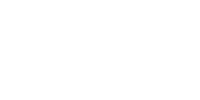

In [2]:
%%svg

<svg id="contenedor-10" width="200" height="100">
    <g id="grupo-10">
    </g>
</svg>

In [3]:
%%javascript

require(["d3"], function(d3){
    
    let circulo = d3.create("svg:circle").
        attr("r", "30").
        attr("fill", "skyblue").
        attr("cx", "50").
        attr("cy", "50").
        node();
    
    let grupo =  d3.select("#grupo-10")
    .node();
    
    grupo.appendChild(circulo);
    console.log(grupo);
    
});

<IPython.core.display.Javascript object>

## La función ```d3.selection.on()```.

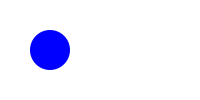

In [11]:
%%svg

<svg id="contenedor-11" width="200" height="100">
    <g id="grupo-11">
        <circle cx="50" cy="50" r="20" fill="blue">
        </circle>
    </g>
</svg>

In [12]:
%%javascript

require(["d3"], function(d3){

    d3.select("#grupo-11").
        selectAll("circle").
        on("mouseover", function(){
            d3.select(this).
            attr("fill", "red");
        }).
        on("mouseout", function(){
            d3.select(this).
            attr("fill", "skyblue");
        });
    
    
   });

<IPython.core.display.Javascript object>

<p style="text-align: center"><a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a><br />Esta obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Licencia Creative Commons Atribución 4.0 Internacional</a>.</p>
<p style="text-align: center">&copy; José Luis Chiquete Valdivieso. 2022.</p>